<a href="https://colab.research.google.com/github/ThanhThuyHuynh/ML/blob/main/Lab_4_20130429_HuynhThiThanhThuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [50]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score
from sklearn import datasets
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [ ]:

# code
data4 = datasets.load_iris()
x = data4['data']
y = data4['target']

Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.25)

classifier = LogisticRegression(random_state = 0)
classifier.fit(Xtrain, yTrain)




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(xTest)
y_pred

array([2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0])

In [ ]:
cm = confusion_matrix(yTest, y_pred)
cm


array([[15,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]])

In [ ]:

pre = precision_score(yTest, y_pred, average='micro')
pre

0.9473684210526315

In [ ]:
re = recall_score(yTest, y_pred, average='micro')
re

0.9473684210526315

In [ ]:

f1_c = f1_score(yTest, y_pred, average='micro')
f1_c

0.9473684210526315

Accuracy :  0.9473684210526315


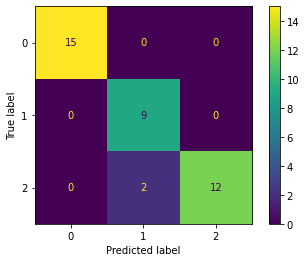

In [ ]:
print ("Accuracy : ", accuracy_score(yTest, y_pred))
ConfusionMatrixDisplay.from_predictions(yTest, y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [13]:
# code
mnist = datasets.load_digits()
x = mnist['data']
y = mnist['target']

Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.35, random_state = 42)




In [ ]:
classifier = LogisticRegression(random_state = 1)
classifier.fit(Xtrain, yTrain)

In [15]:
y_pred = classifier.predict(xTest)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

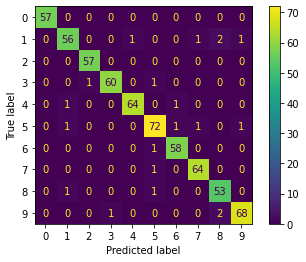

In [16]:
cm = confusion_matrix(yTest, y_pred)
cm
ConfusionMatrixDisplay.from_predictions(yTest, y_pred)

In [21]:
print ("Accuracy : ", accuracy_score(yTest, y_pred))
print ("precision : ", precision_score(yTest, y_pred, average='weighted'))
print ("Recall : ", recall_score(yTest, y_pred, average='weighted'))
print ("F1 : ", f1_score(yTest, y_pred, average='weighted'))

Accuracy :  0.9682034976152624
precision :  0.9682975901721883
Recall :  0.9682034976152624
F1 :  0.9681620540725014


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [22]:
data4 = datasets.load_iris()
x = data4['data']
y = data4['target']

Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.25, random_state = 0)


In [35]:
# code
k_range = range(1,30,2)
accs = []
pred = []
recall = []
f1 = []

In [36]:
for k in k_range:
  kNN = KNeighborsClassifier(n_neighbors=k)
  kNN.fit(Xtrain, yTrain)
  y_pred = kNN.predict(xTest)
  acc = accuracy_score(yTest, y_pred)
  pre = precision_score(yTest, y_pred, average='weighted')
  re = recall_score(yTest, y_pred, average='weighted')
  f1_c = f1_score(yTest, y_pred,average='weighted')
  accs.append(acc)
  pred.append(pre)
  recall.append(re)
  f1.append(f1_c)




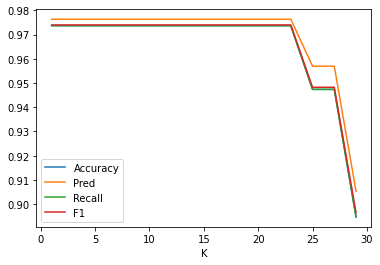

In [38]:
plt.plot(k_range, accs, label = 'Accuracy')
plt.plot(k_range, pred, label = 'Pred')
plt.plot(k_range, recall, label = 'Recall')
plt.plot(k_range, f1, label = 'F1')
plt.xlabel("K")
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [45]:
# code
mnist = datasets.load_digits()
x = mnist['data']
y = mnist['target']

Xtrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size = 0.35)

In [46]:
k_range = range(1,30,2)
accs = []
pred = []
recall = []
f1 = []

In [47]:
for k in k_range:
  kNN = KNeighborsClassifier(n_neighbors=k)
  kNN.fit(Xtrain, yTrain)
  y_pred = kNN.predict(xTest)
  acc = accuracy_score(yTest, y_pred)
  pre = precision_score(yTest, y_pred, average='weighted')
  re = recall_score(yTest, y_pred, average='weighted')
  f1_c = f1_score(yTest, y_pred, average='weighted')
  accs.append(acc)
  pred.append(pre)
  recall.append(re)
  f1.append(f1_c)

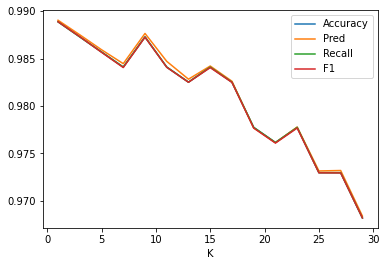

In [48]:
plt.plot(k_range, accs, label = 'Accuracy')
plt.plot(k_range, pred, label = 'Pred')
plt.plot(k_range, recall, label = 'Recall')
plt.plot(k_range, f1, label = 'F1')
plt.xlabel("K")
plt.legend()

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Decision Tree
Accuracy: 0.9055374592833876
Precision: 0.9018567639257294
Recall: 0.8717948717948718
F1-score: 0.8865710560625816
Confusion Matrix:
[[494  37]
 [ 50 340]]


Model: kNN
Accuracy: 0.7904451682953312
Precision: 0.7743732590529248
Recall: 0.7128205128205128
F1-score: 0.7423230974632844
Confusion Matrix:
[[450  81]
 [112 278]]


Model: Logistic Regression
Accuracy: 0.9261672095548317
Precision: 0.9214659685863874
Recall: 0.9025641025641026
F1-score: 0.9119170984455959
Confusion Matrix:
[[501  30]
 [ 38 352]]




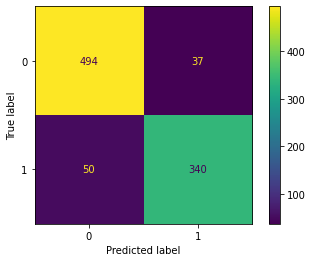

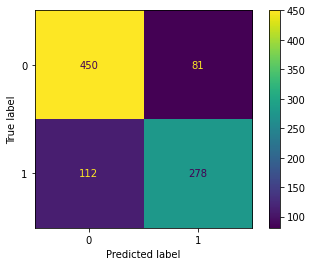

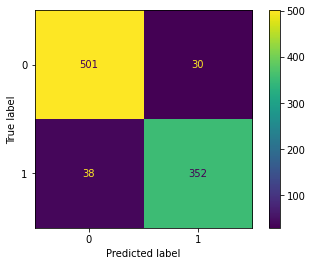

In [53]:


# Load the dataset
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)


# Split into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict using Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Fit and predict using kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Fit and predict using Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


models = [dt, knn, lr]
model_names = ['Decision Tree', 'kNN', 'Logistic Regression']

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Model:", model_names[i])
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    print("\n")



#Finally,
Save a copy in your Github. Remember renaming the notebook.